In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score, precision_score,f1_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

In [2]:
# data import or loading the dataset
df =  pd.read_excel('/content/Pumpkin_Seeds_Dataset.xlsx')
print(df.shape)

(2500, 13)


In [3]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [4]:
df.tail()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Ürgüp Sivrisi
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Ürgüp Sivrisi
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi
2499,84934,1159.933,462.8951,234.5597,85781,328.8485,0.8621,0.9901,0.7360,0.7933,1.9735,0.7104,Ürgüp Sivrisi


In [5]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


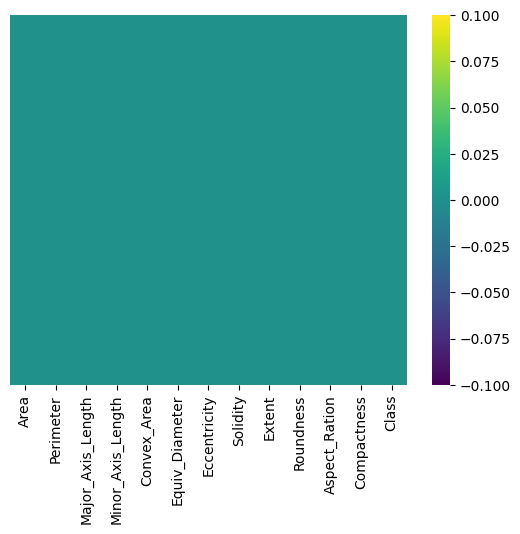

In [7]:
# showing the null values of columns using heatmap
sns.heatmap(df.isna(),yticklabels=False,cmap="viridis")
plt.show()

In [8]:
df.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64

In [9]:
# print a summary of the counts for each unique value in the "Class" column
df["Class"].value_counts()

Çerçevelik       1300
Ürgüp Sivrisi    1200
Name: Class, dtype: int64

In [10]:
# Encoding the Class column data from object to numeric
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df["Class"]=oe.fit_transform(df[["Class"]])

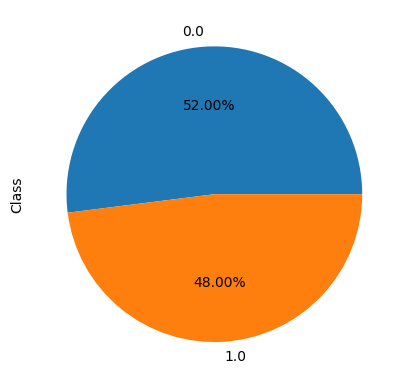

In [11]:
# plotting the summay counts fro each unique values in the "Class" column
df["Class"].value_counts().plot(kind="pie",autopct="%.2f%%")
plt.show()

<Axes: xlabel='Class', ylabel='count'>

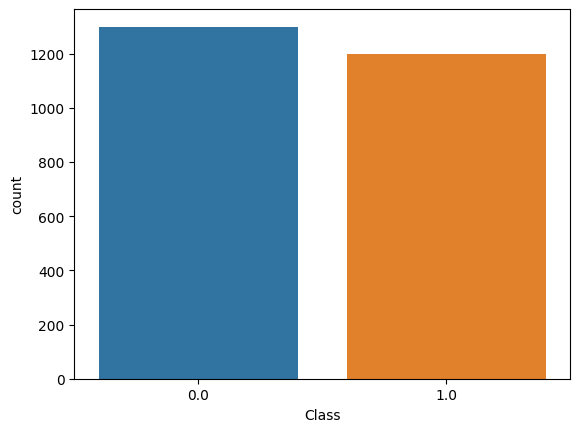

In [12]:
sns.countplot(x='Class',data=df)

<Axes: >

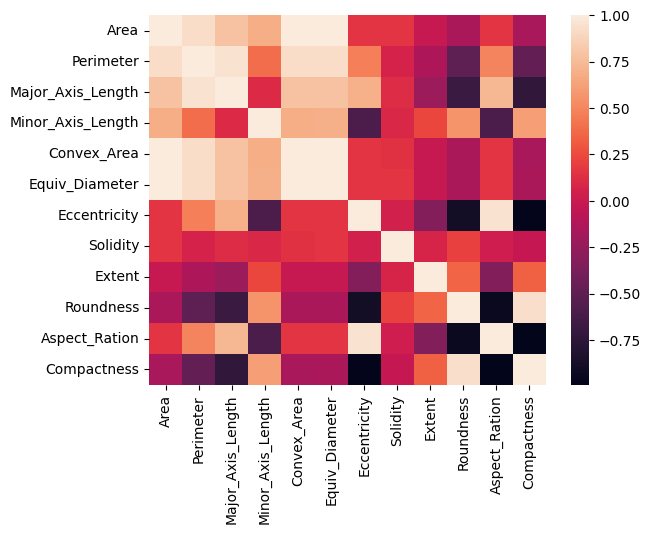

In [13]:
#  generating  heatmap visualizing the correlation matrix of the numerical columns
sns.heatmap(df.drop(columns='Class').corr())

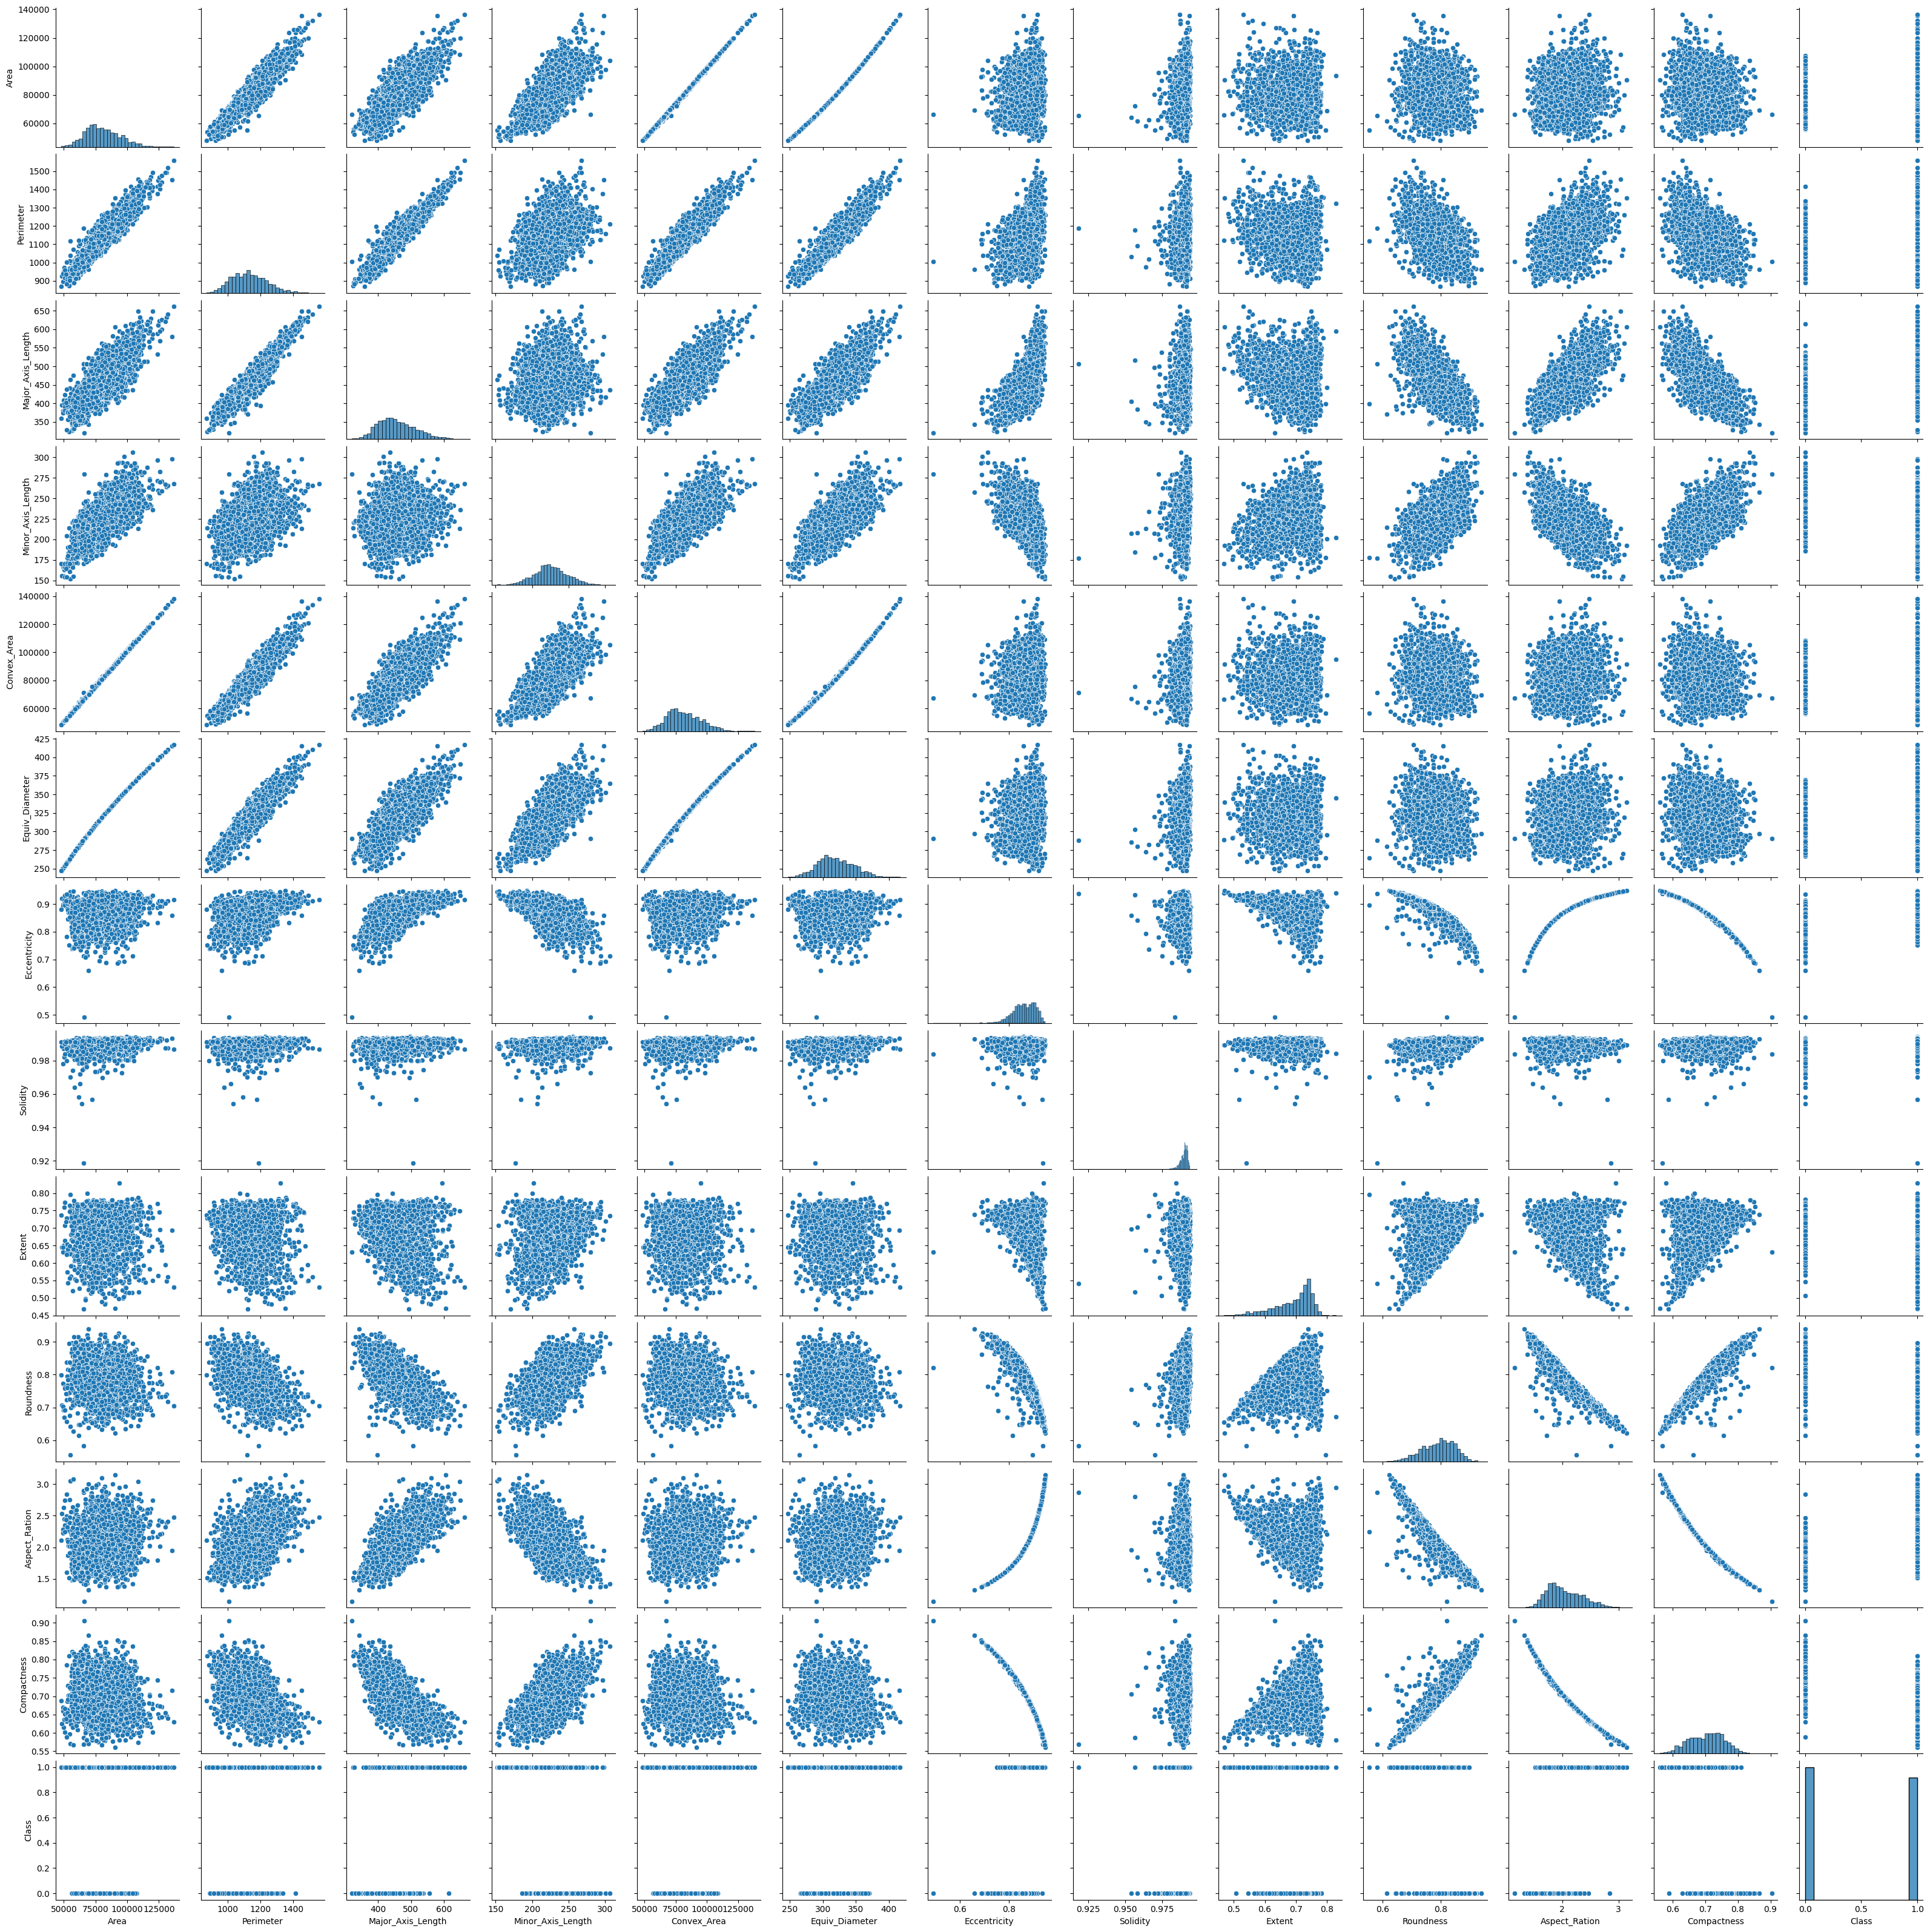

In [ ]:
# generating  grid of scatterplots for all pairs of numerical features
sns.pairplot(df)

In [14]:
# Defining X and Y columns
X = df.drop('Class', axis=1)
y = df['Class']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [16]:
# Normalisation of the Data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Model call
model = LogisticRegression(max_iter=1000)

In [18]:
# Train the  model
model.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=1000)

In [19]:
# Predict the values
y_pred = model.predict(X_test_scaled)

In [20]:
print('Accuracy Score', accuracy_score(y_test,y_pred))
print('Confusion Matrix', confusion_matrix(y_test,y_pred))
print('Classification Report', classification_report(y_test,y_pred))

Accuracy Score 0.8706666666666667
Confusion Matrix [[355  32]
 [ 65 298]]
Classification Report               precision    recall  f1-score   support

         0.0       0.85      0.92      0.88       387
         1.0       0.90      0.82      0.86       363

    accuracy                           0.87       750
   macro avg       0.87      0.87      0.87       750
weighted avg       0.87      0.87      0.87       750



Text(0.5, 47.7222222222222, 'Predicted Labels')

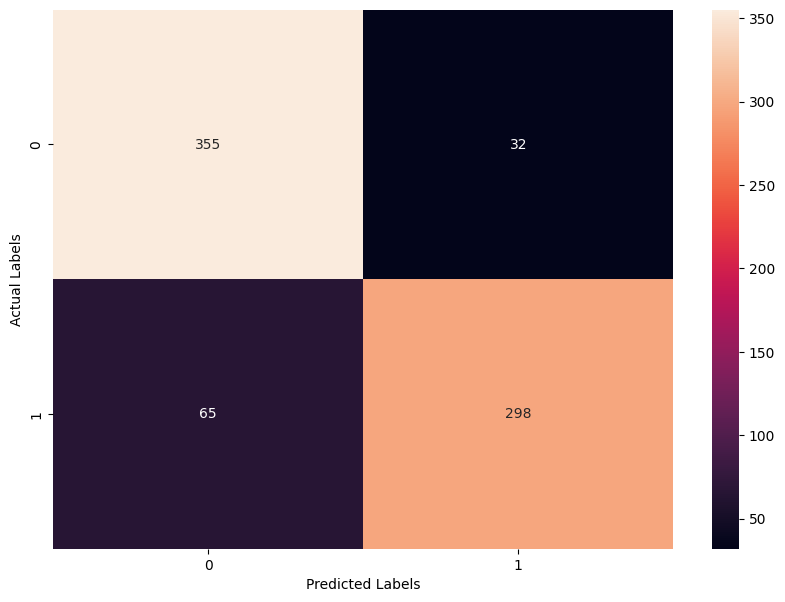

In [21]:
# plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt='d')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')


In [22]:
# save the model
import pickle
pickle.dump(model,
            open('D:\MasterDegreeLessons\First Semester\Machine Learning\Final Project\Models\Logistic_Regression.pkl','wb'))